In [1]:
import numpy as np
from smooth import is_prime
from math import gcd
from bisect import bisect_right
from testTools import primality_complexity, graph_complexity
import sys
from gmpy2 import iroot, isqrt
from sympy.ntheory import perfect_power
from collections import Counter, deque
import json

In [3]:
primes = [int(p) for p in np.load("assets/primes.npy").astype(np.uint32)]


In [46]:
def factorize_naive(n, small_primes=primes):
    output = []
    start = 0
    end = bisect_right(small_primes, isqrt(n)) if n < 1e12 else len(small_primes)
    while not is_prime(n):
        for i in range(start, end):
            p = small_primes[i]
            if n % p != 0:
                continue
            e = 0
            while n % p == 0:
                n //= p
                e += 1
            output.append((p,e))
            if n == 1:
                return (output, 1)
            start = i + 1
            end = bisect_right(small_primes, isqrt(n), lo=start, hi=end) if n < 1e12 else len(small_primes)
            break
        else:
            return (output, n)

    return (output + [(n,1)], 1)

In [202]:
arr = np.load("semiprimes.npy")
semiprimes = [int(s) for s in arr.tolist()]
print(len(semiprimes), max(semiprimes))

78849 524300086747


In [19]:
data = [semiprimes[i] for i in range(0,len(semiprimes), 8)]
print(len(data))
times_naive = primality_complexity(lambda n : factorize_naive(n, small_primes=primes), 0, data)

9857
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

Finished concat.
Graphing...
523.25 524300086747 3.278255462868529e-06 0.012167453765869363


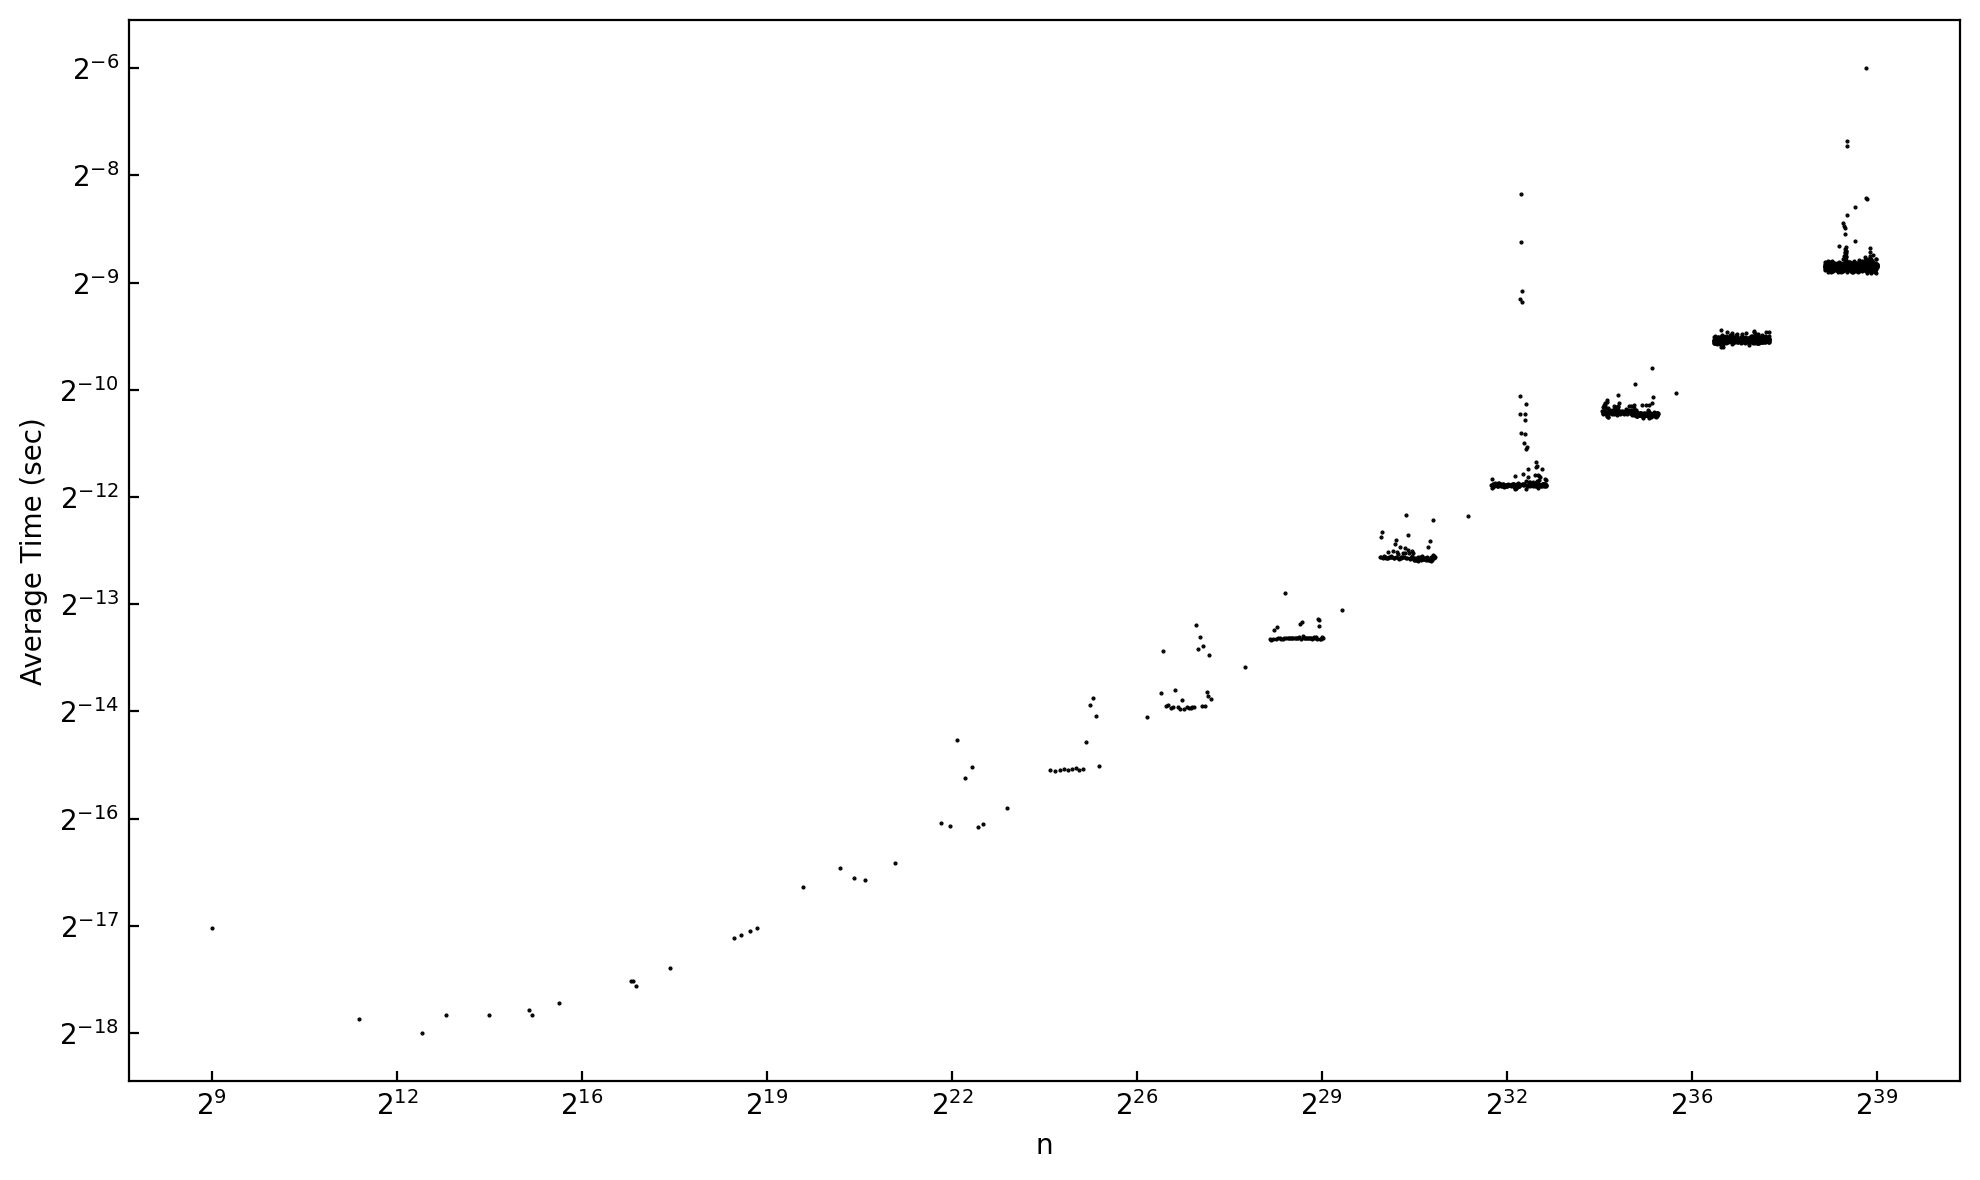

In [22]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_naive[0]], times_naive[1], dpts=2000, log=True)

In [82]:
M = (
    1, 3, 5, 7, 11, 13, 17, 19,
    23, 29, 31, 37, 41, 43, 47, 53,
    59, 61, 67, 71, 73, 79, 83, 89,
    97, 101, 103, 107, 109, 113, 127, 131
)

def squfof(n):
    for m in M:
        mn = m * n
        r = isqrt(mn)
        rn = r
        b = r
        a = 1
        h = rn
        c = mn - h * h

        for i in range(2, 4 * isqrt(2 * r)):
            a, c = c, a
            q = (rn + b) // a
            t = b
            b = q * a - b
            c += q * (t - b)

            if not (i & 1):
                r = isqrt(c)
                if r * r == c:
                    q = (rn - b) // r
                    v = q * r + b
                    w = (mn - v * v) // r
                    u = r
                    while True:
                        w, u = u, w
                        r = v
                        q = (rn + v) // u
                        v = q * u - v
                        
                        if v == r:
                            break
                        w += q * (r - v)
                    h = gcd(n, u)
                    if h != 1:
                        return h
    return 1

def factorize(n):
    FACTORS = Counter()
    trial = factorize_naive(n)
    if trial[1] == 1:
        return trial[0]
    else:
        for p, exp in trial[0]:
            FACTORS[p] += exp
        n = trial[1]
    stack = deque([n])

    while stack:
        m = stack.pop()  
        if is_prime(m):
            FACTORS[m] += 1
            continue
        res = perfect_power(m)
        if res:
            b, e = res
            stack.extend([int(b)]*e)
            continue
        
        f = squfof(m)
        stack.append(f)
        stack.append(m // f)

    return list(FACTORS.items())

In [68]:
factorize(4294967291*4294967311)

[(4294967311, 1), (4294967291, 1)]

In [38]:
with open("assets/large_prime_dataset.json", 'r') as f:
    raw = json.load(f)
data =  {int(k): v for k, v in raw.items()}

indexed_64_bit_primes = {}
for b in range(8,17):
    indexed_64_bit_primes[b] = [(2**b - k) for k in data[b]]

In [ ]:
large_semiprimes = []
for b in range(8,17):
    count = 0
    for i1, p1 in enumerate(indexed_64_bit_primes[b]):
        if count >= 100:
            break
        for i2, p2 in enumerate(indexed_64_bit_primes[b][i1:]):
            if count >= 100:
                break
            for i3, p3 in enumerate(indexed_64_bit_primes[b][i2:]):
                if count >= 100:
                    break
                for i4, p4 in enumerate(indexed_64_bit_primes[b][i3:]):
                    if count >= 100:
                        break
                    large_semiprimes.append(p1*p2*p3*p4)
                    count += 1

print(len(large_semiprimes), max(large_semiprimes))
print(max(large_semiprimes).bit_length())
print(large_semiprimes[890:])

900 18429861372428076481
64
[18387693888802443791, 18384884333912410261, 18380950957066363319, 18379827135110349907, 18378141402176329789, 18384884333912410261, 18382075208309416631, 18378142432465225549, 18377018782224028097, 18375333306862231919]


In [ ]:
print(factorize(31986542490568214944787381530112383907086))
# print(18446744073709551437*18446744073709551337 == 340282366920938455014765821672793621269)
18446744073709551437*18446744073709551437

[(2, 1), (47, 1), (18446744073709551437, 2)]


31986542490568214944787381530112383907086

In [42]:
# from ROSETTA_SQF import squfof
# factorize(large_semiprimes[961])
# # large_semiprimes[961] % 1099503239183
# print(1048573 * 1048573 == 1099505336329)
# f(1099505336329)
# # 1048573 * 1048573 == 1099505336329

In [84]:
with open("temp_data.txt") as f:
    loaded = [(line.strip()) for line in f]

loaded = [int(c) for c in loaded]

In [90]:
times_sqf = primality_complexity(lambda n : factorize(n), 0, loaded)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [88]:
times_sqf = primality_complexity(lambda n : factorize(n), 0, large_semiprimes)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
129188502.33333333 1.190375620694306e+19 8.980433146380898e-06 0.06672700246175152


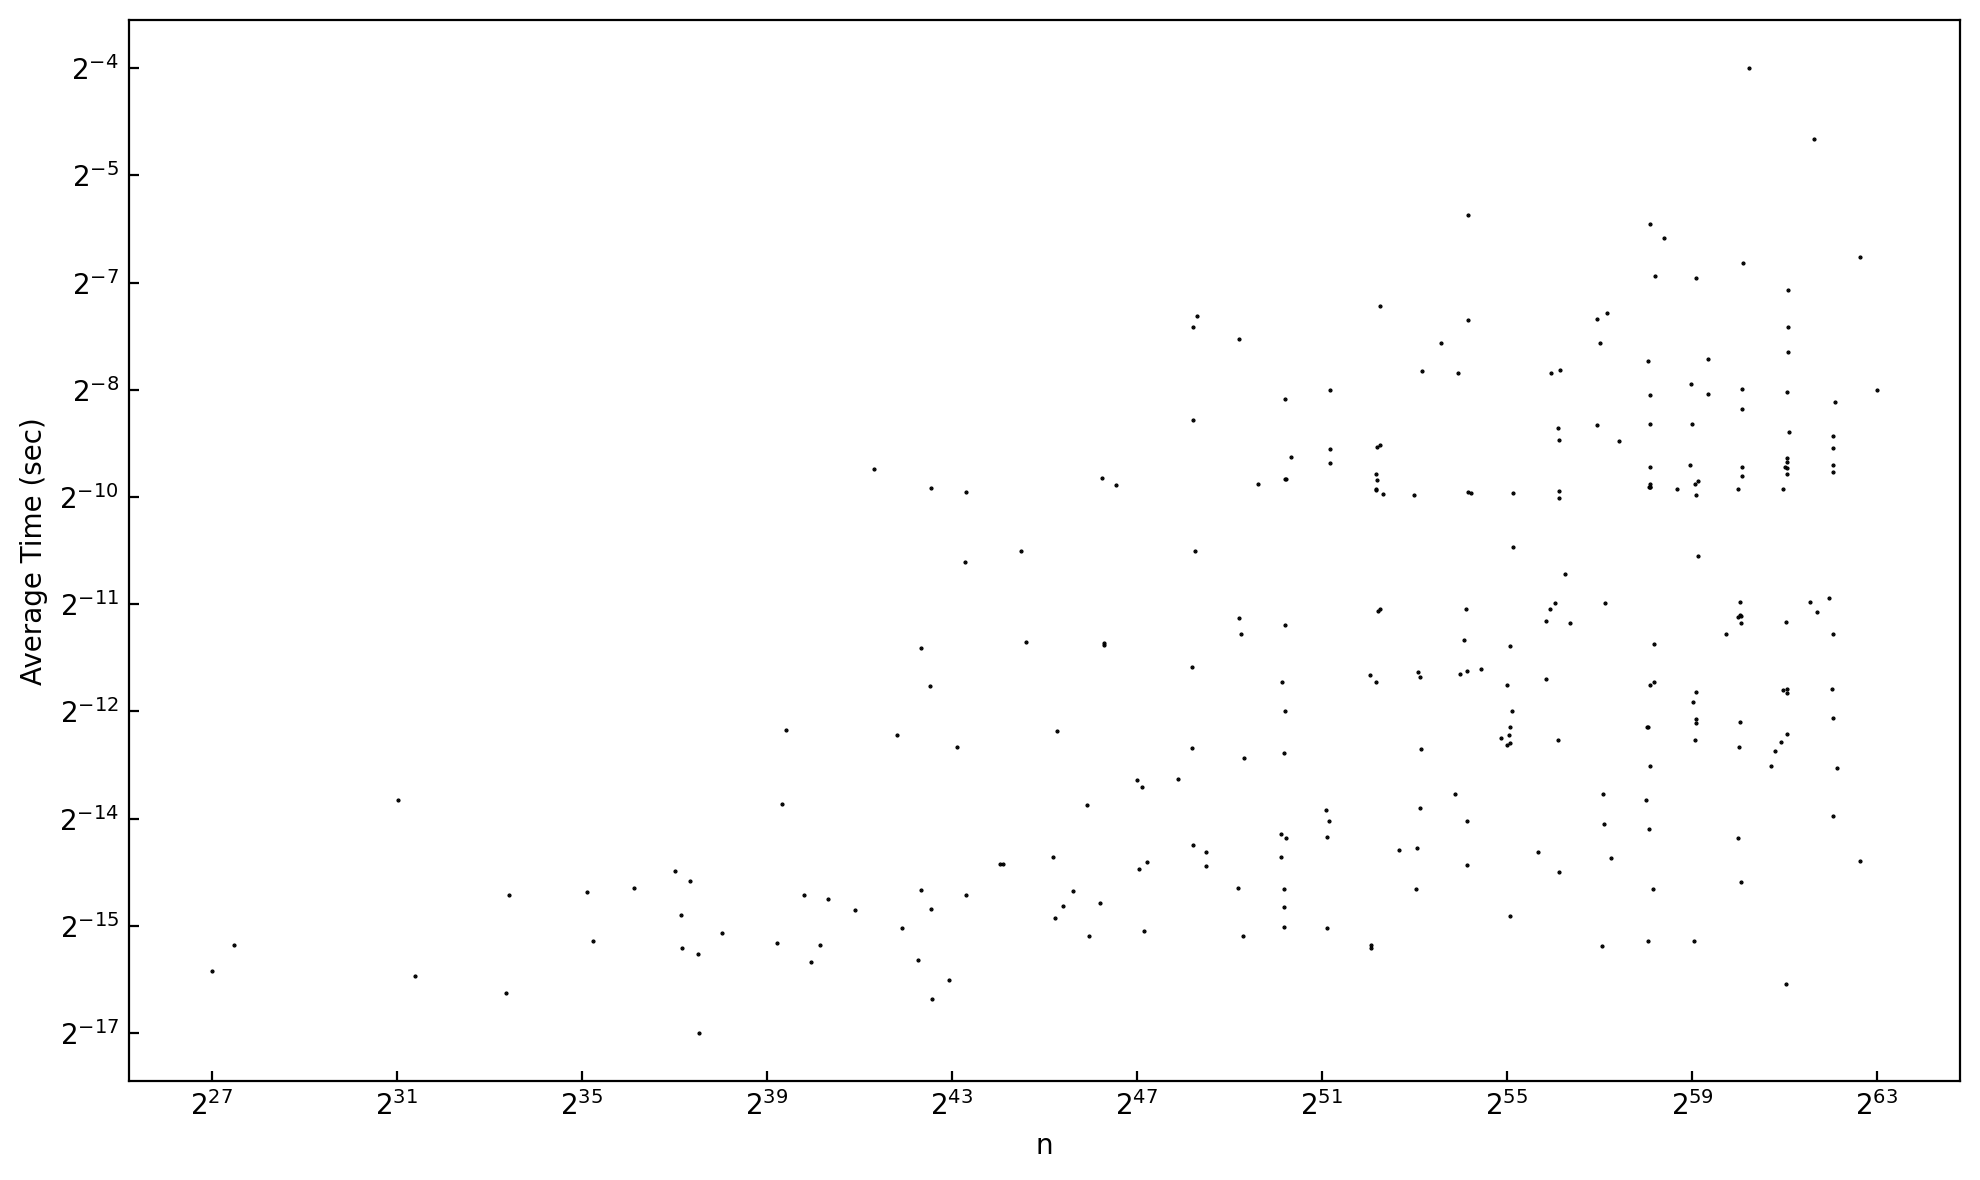

In [91]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_sqf[0]], times_sqf[1], dpts=200, log=True)